In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras import backend as K
from keras.models import load_model

import numpy as np 
import pandas as pd
from scipy.io import loadmat
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math
import pickle
import matplotlib.image as mpimg
import scipy
from PIL import Image
from scipy import ndimage
import pickle
import tensorflow as tf

/home/mehdi/anaconda3/envs/py3-clean/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
def one_hot_mat(labels, c):
    '''
    labels - a vector whose ith entry is the label of the ith training exmaple
    c - the number classes in the training data
    
    Output is a matrix whose ith row is the one-hot vector of the ith entry in a tensor of shape m, c
    '''
    C = tf.constant(c, name='C')
    one_hot_matrix = tf.one_hot(indices=labels,depth=C,axis=0)
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
    return one_hot

def plot_digit(digit):
    digit = digit.reshape(28,28)
    plt.imshow(digit, matplotlib.cm.binary, interpolation='nearest')
    plt.show()

In [10]:
mnist = loadmat('./data/mnist-original.mat')
mnist.keys()

X, y = mnist['data'], mnist['label']
X = np.transpose(X) # 28**2 features in b/w
y = np.transpose(y)
X.shape, y.shape

y = np.reshape(y,(70000,))

dict_keys(['mldata_descr_ordering', '__globals__', '__header__', 'data', 'label', '__version__'])

((70000, 784), (70000, 1))

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

X_train = np.reshape(X_train, (-1,28,28,1))
X_test = np.reshape(X_test, (-1,28,28,1))

In [12]:
X_train = (X_train)/256
X_test = (X_test)/256
y_train = one_hot_mat(y_train, 10)
y_test = one_hot_mat(y_test, 10)
y_train = np.transpose(y_train)
y_test = np.transpose(y_test)
print('X_train.shape = ',X_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_train.shape =',y_train.shape)
print('y_test.shape =',y_test.shape)

X_train.shape =  (60000, 28, 28, 1)
X_test.shape =  (10000, 28, 28, 1)
y_train.shape = (60000, 10)
y_test.shape = (10000, 10)


In [ ]:
model = load_model('mnist_model.h5')

In [7]:
model = Sequential([Conv2D(32, kernel_size = (5,5), activation='relu', input_shape=(28,28,1)),
                    MaxPooling2D(pool_size = (2,2)),
                    Conv2D(64, kernel_size = (5,5), activation='relu'),
                    MaxPooling2D(pool_size = (2,2)),
                    Flatten(),
                    Dense(1024, activation='relu'),
                    Dropout(0.4),
                    Dense(512, activation='relu'),
                    Dense(10, activation = 'softmax')
                   ])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train, y_train, epochs=3, batch_size=64)

Epoch 1/3
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0482 - acc: 0.9870

In [13]:
scores = model.evaluate(X_test, y_test, verbose=0)
scores

[0.05305161956169331, 0.9872]

(28, 28, 1)

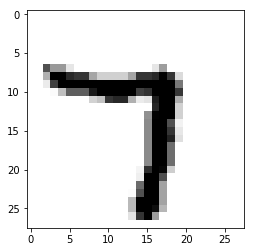

label: 7


In [18]:
i = 7238

some_digit = X_test[i]
some_digit.shape
plot_digit(some_digit)
label = np.argmax(y_test[i])
print('label:', label)

In [19]:
x = np.reshape(X_test[i,:,:,:], (1,28,28,1))
y = model.predict(x)
pred = np.argmax(y, axis=1)
print('pred: ', pred[0])

pred:  7


In [15]:
model.save('mnist_model.h5')